## Assignment 3
All questions are weighted the same in this assignment. This assignment requires more individual learning then the last one did - you are encouraged to check out the pandas documentation to find functions or methods you might not have used yet, or ask questions on Stack Overflow and tag them as pandas and python related. All questions are worth the same number of points except question 1 which is worth 17% of the assignment grade.

Note: Questions 2-13 rely on your question 1 answer.

In [86]:
import pandas as pd
import numpy as np

# Filter all warnings. If you would like to see the warnings, please comment the two lines below.
import warnings
warnings.filterwarnings('ignore')

### Question 1
Load the energy data from the file assets/Energy Indicators.xls, which is a list of indicators of energy supply and renewable electricity production from the United Nations for the year 2013, and should be put into a DataFrame with the variable name of Energy.

Keep in mind that this is an Excel file, and not a comma separated values file. Also, make sure to exclude the footer and header information from the datafile. The first two columns are unneccessary, so you should get rid of them, and you should change the column labels so that the columns are:

['Country', 'Energy Supply', 'Energy Supply per Capita', '% Renewable]

Convert Energy Supply to gigajoules (Note: there are 1,000,000 gigajoules in a petajoule). For all countries which have missing data (e.g. data with "...") make sure this is reflected as np.NaN values.

Rename the following list of countries (for use in later questions):

"Republic of Korea": "South Korea", "United States of America": "United States", "United Kingdom of Great Britain and Northern Ireland": "United Kingdom", "China, Hong Kong Special Administrative Region": "Hong Kong"

There are also several countries with parenthesis in their name. Be sure to remove these, e.g. 'Bolivia (Plurinational State of)' should be 'Bolivia'. Additionally, there are several countries with Numeric digits in their name. Make sure to remove these as well, e.g. 'Italy9' should be 'Italy'.

Next, load the GDP data from the file assets/world_bank.csv, which is a csv containing countries' GDP from 1960 to 2015 from World Bank. Call this DataFrame GDP.

Make sure to skip the header, and rename the following list of countries:

"Korea, Rep.": "South Korea",  "Iran, Islamic Rep.": "Iran", "Hong Kong SAR, China": "Hong Kong"

Finally, load the Sciamgo Journal and Country Rank data for Energy Engineering and Power Technology from the file assets/scimagojr-3.xlsx, which ranks countries based on their journal contributions in the aforementioned area. Call this DataFrame ScimEn.

Join the three datasets: GDP, Energy, and ScimEn into a new dataset (using the intersection of country names). Use only the last 10 years (2006-2015) of GDP data and only the top 15 countries by Scimagojr 'Rank' (Rank 1 through 15).

The index of this DataFrame should be the name of the country, and the columns should be ['Rank', 'Documents', 'Citable documents', 'Citations', 'Self-citations', 'Citations per document', 'H index', 'Energy Supply', 'Energy Supply per Capita', '% Renewable', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015'].

This function should return a DataFrame with 20 columns and 15 entries, and the rows of the DataFrame should be sorted by "Rank".

In [87]:
def answer_one():
	# YOUR CODE HERE
	Energy = pd.read_excel('assets/Energy Indicators.xls', skiprows=17,skipfooter=38)
	Energy = Energy[['Unnamed: 1','Petajoules','Gigajoules','%']]
	Energy.columns = ['Country', 'Energy Supply', 'Energy Supply per Capita', '% Renewable']
	Energy[['Energy Supply', 'Energy Supply per Capita', '% Renewable']] = Energy[['Energy Supply', 'Energy Supply per Capita', '% Renewable']].replace('...',np.NaN).apply(pd.to_numeric)
	Energy['Energy Supply'] *= 1000000
	Energy['Country'] = Energy['Country'].replace({"Republic of Korea": "South Korea",
												   "United States of America": "United States",
												   "United Kingdom of Great Britain and Northern Ireland": "United Kingdom",
												   "China, Hong Kong Special Administrative Region": "Hong Kong"})
	
	Energy['Country'] = Energy['Country'].str.replace(r" \(.*\)","")   # Remove parentheses
	Energy['Country'] = Energy['Country'].str.replace(r"\d+", "")  # Remove numeric digits
	Energy['Country'] = Energy['Country'].str.strip()
	
	
	GDP = pd.read_csv('assets/world_bank.csv', skiprows=4)
	GDP['Country Name'] = GDP['Country Name'].replace({"Korea, Rep.": "South Korea",
													   "Iran, Islamic Rep.": "Iran",
													   "Hong Kong SAR, China": "Hong Kong"})
	
	GDP = GDP[['Country Name','2006','2007','2008','2009','2010','2011','2012','2013','2014','2015']]
	GDP.columns = ['Country','2006','2007','2008','2009','2010','2011','2012','2013','2014','2015']
	
	ScimEn = pd.read_excel('assets/scimagojr-3.xlsx')
	ScimEn_m = ScimEn[:17]
	
	df = pd.merge(ScimEn_m,Energy,how='inner',left_on='Country',right_on='Country')
	final_df = pd.merge(df,GDP,how='inner',left_on='Country',right_on='Country')
	final_df = final_df.set_index('Country')
	

	return final_df
	raise NotImplementedError()

answer_one()

,Rank,Documents,Citable documents,Citations,Self-citations,Citations per document,H index,Energy Supply,Energy Supply per Capita,% Renewable,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
Country,,,,,,,,,,,,,,,,,,,,
China,1,127050,126767,597237,411683,4.70,138,1.271910e+11,93.0,19.754910,3.992331e+12,4.559041e+12,4.997775e+12,5.459247e+12,6.039659e+12,6.612490e+12,7.124978e+12,7.672448e+12,8.230121e+12,8.797999e+12
United States,2,96661,94747,792274,265436,8.20,230,9.083800e+10,286.0,11.570980,1.479230e+13,1.505540e+13,1.501149e+13,1.459484e+13,1.496437e+13,1.520402e+13,1.554216e+13,1.577367e+13,1.615662e+13,1.654857e+13
Japan,3,30504,30287,223024,61554,7.31,134,1.898400e+10,149.0,10.232820,5.496542e+12,5.617036e+12,5.558527e+12,5.251308e+12,5.498718e+12,5.473738e+12,5.569102e+12,5.644659e+12,5.642884e+12,5.669563e+12
United Kingdom,4,20944,20357,206091,37874,9.84,139,7.920000e+09,124.0,10.600470,2.419631e+12,2.482203e+12,2.470614e+12,2.367048e+12,2.403504e+12,2.450911e+12,2.479809e+12,2.533370e+12,2.605643e+12,2.666333e+12
Russian Federation,5,18534,18301,34266,12422,1.85,57,3.070900e+10,214.0,17.288680,1.385793e+12,1.504071e+12,1.583004e+12,1.459199e+12,1.524917e+12,1.589943e+12,1.645876e+12,1.666934e+12,1.678709e+12,1.616149e+12
Canada,6,17899,17620,215003,40930,12.01,149,1.043100e+10,296.0,61.945430,1.564469e+12,1.596740e+12,1.612713e+12,1.565145e+12,1.613406e+12,1.664087e+12,1.693133e+12,1.730688e+12,1.773486e+12,1.792609e+12
Germany,7,17027,16831,140566,27426,8.26,126,1.326100e+10,165.0,17.901530,3.332891e+12,3.441561e+12,3.478809e+12,3.283340e+12,3.417298e+12,3.542371e+12,3.556724e+12,3.567317e+12,3.624386e+12,3.685556e+12
India,8,15005,14841,128763,37209,8.58,115,3.319500e+10,26.0,14.969080,1.265894e+12,1.374865e+12,1.428361e+12,1.549483e+12,1.708459e+12,1.821872e+12,1.924235e+12,2.051982e+12,2.200617e+12,2.367206e+12
France,9,13153,12973,130632,28601,9.93,114,1.059700e+10,166.0,17.020280,2.607840e+12,2.669424e+12,2.674637e+12,2.595967e+12,2.646995e+12,2.702032e+12,2.706968e+12,2.722567e+12,2.729632e+12,2.761185e+12


In [88]:
assert type(answer_one()) == pd.DataFrame, "Q1: You should return a DataFrame!"

assert answer_one().shape == (15,20), "Q1: Your DataFrame should have 20 columns and 15 entries!"

### Question 2
The previous question joined three datasets then reduced this to just the top 15 entries. When you joined the datasets, but before you reduced this to the top 15 items, how many entries did you lose?

This function should return a single number.

In [89]:
%%HTML
<svg width="800" height="300">
  <circle cx="150" cy="180" r="80" fill-opacity="0.2" stroke="black" stroke-width="2" fill="blue" />
  <circle cx="200" cy="100" r="80" fill-opacity="0.2" stroke="black" stroke-width="2" fill="red" />
  <circle cx="100" cy="100" r="80" fill-opacity="0.2" stroke="black" stroke-width="2" fill="green" />
  <line x1="150" y1="125" x2="300" y2="150" stroke="black" stroke-width="2" fill="black" stroke-dasharray="5,3"/>
  <text x="300" y="165" font-family="Verdana" font-size="35">Everything but this!</text>
</svg>

In [90]:
def answer_two():
    #YOUR CODE HERE
    Energy = pd.read_excel('assets/Energy Indicators.xls', skiprows=17,skipfooter=38)
    GDP = pd.read_csv('assets/world_bank.csv',skiprows=4)
    ScimEn = pd.read_excel('assets/scimagojr-3.xlsx')
    
    Energy = Energy[['Unnamed: 1','Petajoules','Gigajoules','%']]
    Energy.columns = ['Country', 'Energy Supply', 'Energy Supply per Capita', '% Renewable']
    Energy[['Energy Supply', 'Energy Supply per Capita', '% Renewable']] =  Energy[['Energy Supply', 'Energy Supply per Capita', '% Renewable']].replace('...',np.NaN).apply(pd.to_numeric)
    Energy['Energy Supply'] = Energy['Energy Supply']*1000000
    Energy['Country'] = Energy['Country'].replace({'China, Hong Kong Special Administrative Region':'Hong Kong','United Kingdom of Great Britain and Northern Ireland':'United Kingdom','Republic of Korea':'South Korea','United States of America':'United States','Iran (Islamic Republic of)':'Iran'})
    Energy['Country'] = Energy['Country'].str.replace(r" \(.*\)","")

    GDP['Country Name'] = GDP['Country Name'].replace('Korea, Rep.','South Korea')
    GDP['Country Name'] = GDP['Country Name'].replace('Iran, Islamic Rep.','Iran')
    GDP['Country Name'] = GDP['Country Name'].replace('Hong Kong SAR, China','Hong Kong')
    GDP = GDP[['Country Name','2006','2007','2008','2009','2010','2011','2012','2013','2014','2015']]
    GDP.columns = ['Country','2006','2007','2008','2009','2010','2011','2012','2013','2014','2015']

    # Merge dataframes
    df_inner = pd.merge(pd.merge(Energy, GDP, on='Country'), ScimEn, on='Country')
    df_outer = pd.merge(pd.merge(Energy, GDP, how='outer', on='Country'), ScimEn, how='outer', on='Country')

    return len(df_outer) - len(df_inner)
    raise NotImplementedError()

answer_two()

160

In [91]:
assert type(answer_two()) == int, "Q2: You should return an int number!"

### Question 3
What are the top 15 countries for average GDP over the last 10 years?

This function should return a Series named avgGDP with 15 countries and their average GDP sorted in descending order.

In [92]:
def answer_three():
    # YOUR CODE HERE
    Energy = pd.read_excel('assets/Energy Indicators.xls', skiprows=17,skipfooter=38)
    GDP = pd.read_csv('assets/world_bank.csv',skiprows=4)
    ScimEn = pd.read_excel('assets/scimagojr-3.xlsx')
    
    Energy = Energy[['Unnamed: 1','Petajoules','Gigajoules','%']]
    Energy.columns = ['Country', 'Energy Supply', 'Energy Supply per Capita', '% Renewable']
    Energy[['Energy Supply', 'Energy Supply per Capita', '% Renewable']] =  Energy[['Energy Supply', 'Energy Supply per Capita', '% Renewable']].replace('...',np.NaN).apply(pd.to_numeric)
    Energy['Energy Supply'] = Energy['Energy Supply']*1000000
    Energy['Country'] = Energy['Country'].replace({'China, Hong Kong Special Administrative Region':'Hong Kong','United Kingdom of Great Britain and Northern Ireland':'United Kingdom','Republic of Korea':'South Korea','United States of America':'United States','Iran (Islamic Republic of)':'Iran'})
    Energy['Country'] = Energy['Country'].str.replace(r" \(.*\)","")

    GDP['Country Name'] = GDP['Country Name'].replace('Korea, Rep.','South Korea')
    GDP['Country Name'] = GDP['Country Name'].replace('Iran, Islamic Rep.','Iran')
    GDP['Country Name'] = GDP['Country Name'].replace('Hong Kong SAR, China','Hong Kong')
    GDP = GDP[['Country Name','2006','2007','2008','2009','2010','2011','2012','2013','2014','2015']]
    GDP.columns = ['Country','2006','2007','2008','2009','2010','2011','2012','2013','2014','2015']

    ScimEn_m = ScimEn[:15]

    df = pd.merge(ScimEn_m, Energy, how = 'inner', left_on = 'Country', right_on='Country')
    final_df = pd.merge(df,GDP, how = 'inner', left_on = 'Country', right_on='Country')
    final_df = final_df.set_index('Country')

    avgGDP = final_df[['2006','2007','2008','2009','2010','2011','2012','2013','2014','2015']].mean(axis=1).sort_values(ascending=False)

    return avgGDP
    raise NotImplementedError()

answer_three()

Country
United States         1.536434e+13
China                 6.348609e+12
Japan                 5.542208e+12
Germany               3.493025e+12
France                2.681725e+12
United Kingdom        2.487907e+12
Brazil                2.189794e+12
Italy                 2.120175e+12
India                 1.769297e+12
Canada                1.660647e+12
Russian Federation    1.565459e+12
Spain                 1.418078e+12
Australia             1.164043e+12
South Korea           1.106715e+12
Iran                  4.441558e+11
dtype: float64

In [93]:
assert type(answer_three()) == pd.Series, "Q3: You should return a Series!"

### Question 4
By how much had the GDP changed over the 10 year span for the country with the 6th largest average GDP?

This function should return a single number.

In [94]:
def answer_four():
    # YOUR CODE HERE
    Energy = pd.read_excel('assets/Energy Indicators.xls', skiprows=17,skipfooter=38)
    Energy = Energy[['Unnamed: 1','Petajoules','Gigajoules','%']]
    Energy.columns = ['Country', 'Energy Supply', 'Energy Supply per Capita', '% Renewable']
    Energy[['Energy Supply', 'Energy Supply per Capita', '% Renewable']] =  Energy[['Energy Supply', 'Energy Supply per Capita', '% Renewable']].replace('...',np.NaN).apply(pd.to_numeric)
    Energy['Energy Supply'] = Energy['Energy Supply']*1000000
    Energy['Country'] = Energy['Country'].replace({'China, Hong Kong Special Administrative Region':'Hong Kong',
                                                   'United Kingdom of Great Britain and Northern Ireland':'United Kingdom',
                                                   'Republic of Korea':'South Korea','United States of America':'United States',
                                                   'Iran (Islamic Republic of)':'Iran'})
    Energy['Country'] = Energy['Country'].str.replace(r" \(.*\)","")

    # Load world_bank.csv
    GDP = pd.read_csv('assets/world_bank.csv',skiprows=4)
    GDP['Country Name'] = GDP['Country Name'].replace('Korea, Rep.','South Korea')
    GDP['Country Name'] = GDP['Country Name'].replace('Iran, Islamic Rep.','Iran')
    GDP['Country Name'] = GDP['Country Name'].replace('Hong Kong SAR, China','Hong Kong')
    GDP = GDP[['Country Name','2006','2007','2008','2009','2010','2011','2012','2013','2014','2015']]
    GDP.columns = ['Country','2006','2007','2008','2009','2010','2011','2012','2013','2014','2015']

    # Load scimagojr-3.xlsx
    ScimEn = pd.read_excel('assets/scimagojr-3.xlsx')
    ScimEn_m = ScimEn[:15]

    # Merge dataframes
    df = pd.merge(ScimEn_m, Energy, how = 'inner', left_on = 'Country', right_on='Country')
    final_df = pd.merge(df,GDP, how = 'inner', left_on = 'Country', right_on='Country')
    final_df = final_df.set_index('Country')

    # Calculate average GDP over the last 10 years for each country
    avgGDP = final_df[['2006','2007','2008','2009','2010','2011','2012','2013','2014','2015']].mean(axis=1).sort_values(ascending=False)

    # Get the country with the 6th largest average GDP
    country = avgGDP.index[5]

    # Calculate the change in GDP over the 10 year span for the country with the 6th largest average GDP
    GDP_change = final_df.loc[country, '2015'] - final_df.loc[country, '2006']

    return GDP_change
    raise NotImplementedError()

answer_four()

246702696075.3999

In [95]:
# Cell for autograder.

### Question 5
What is the mean energy supply per capita?

This function should return a single number.

In [96]:
def answer_five():
	# YOUR CODE HERE
	Energy = pd.read_excel('assets/Energy Indicators.xls', skiprows=17,skipfooter=38)
	Energy = Energy[['Unnamed: 1','Petajoules','Gigajoules','%']]
	Energy.columns = ['Country', 'Energy Supply', 'Energy Supply per Capita', '% Renewable']
	Energy[['Energy Supply', 'Energy Supply per Capita', '% Renewable']] = Energy[['Energy Supply', 'Energy Supply per Capita', '% Renewable']].replace('...',np.NaN).apply(pd.to_numeric)
	Energy['Energy Supply'] *= 1000000
	Energy['Country'] = Energy['Country'].replace({"Republic of Korea": "South Korea",
													"United States of America": "United States",
													"United Kingdom of Great Britain and Northern Ireland": "United Kingdom",
													"China, Hong Kong Special Administrative Region": "Hong Kong"})

	Energy['Country'] = Energy['Country'].str.replace(r" \(.*\)","")   # Remove parentheses
	Energy['Country'] = Energy['Country'].str.replace(r"\d+", "")  # Remove numeric digits
	Energy['Country'] = Energy['Country'].str.strip()

	mean_energy_supply_per_capita = Energy['Energy Supply per Capita'].mean()

	return mean_energy_supply_per_capita
	raise NotImplementedError()

answer_five()

90.66666666666667

In [97]:
# Cell for autograder.

### Question 6
What country has the maximum % Renewable and what is the percentage?

This function should return a tuple with the name of the country and the percentage.

In [98]:
def answer_six():
	# YOUR CODE HERE
	Energy = pd.read_excel('assets/Energy Indicators.xls', skiprows=17,skipfooter=38)
	Energy = Energy[['Unnamed: 1','Petajoules','Gigajoules','%']]
	Energy.columns = ['Country', 'Energy Supply', 'Energy Supply per Capita', '% Renewable']
	Energy[['Energy Supply', 'Energy Supply per Capita', '% Renewable']] = Energy[['Energy Supply', 'Energy Supply per Capita', '% Renewable']].replace('...',np.NaN).apply(pd.to_numeric)
	Energy['Energy Supply'] *= 1000000
	Energy['Country'] = Energy['Country'].replace({"Republic of Korea": "South Korea",
													"United States of America": "United States",
													"United Kingdom of Great Britain and Northern Ireland": "United Kingdom",
													"China, Hong Kong Special Administrative Region": "Hong Kong"})

	Energy['Country'] = Energy['Country'].str.replace(r" \(.*\)","")
	Energy['Country'] = Energy['Country'].str.replace(r"\d+", "")
	Energy['Country'] = Energy['Country'].str.strip()

	# Find the country with the maximum % Renewable
	max_renewable = Energy.loc[Energy['% Renewable'].idxmax()]['Country']
	max_renewable_value = Energy['% Renewable'].max()

	return (max_renewable, max_renewable_value)
	raise NotImplementedError()

answer_six()

('Albania', 100.0)

In [99]:
assert type(answer_six()) == tuple, "Q6: You should return a tuple!"

assert type(answer_six()[0]) == str, "Q6: The first element in your result should be the name of the country!"

### Question 7
Create a new column that is the ratio of Self-Citations to Total Citations. What is the maximum value for this new column, and what country has the highest ratio?

This function should return a tuple with the name of the country and the ratio.

In [100]:
def answer_seven():
    # YOUR CODE HERE
    Energy = pd.read_excel('assets/Energy Indicators.xls', skiprows=17,skipfooter=38)
    Energy = Energy[['Unnamed: 1','Petajoules','Gigajoules','%']]
    Energy.columns = ['Country', 'Energy Supply', 'Energy Supply per Capita', '% Renewable']
    Energy[['Energy Supply', 'Energy Supply per Capita', '% Renewable']] =  Energy[['Energy Supply', 'Energy Supply per Capita', '% Renewable']].replace('...',np.NaN).apply(pd.to_numeric)
    Energy['Energy Supply'] = Energy['Energy Supply']*1000000
    Energy['Country'] = Energy['Country'].replace({'China, Hong Kong Special Administrative Region':'Hong Kong','United Kingdom of Great Britain and Northern Ireland':'United Kingdom','Republic of Korea':'South Korea','United States of America':'United States','Iran (Islamic Republic of)':'Iran'})
    Energy['Country'] = Energy['Country'].str.replace(r" \(.*\)","")

    # Load world_bank.csv
    GDP = pd.read_csv('assets/world_bank.csv',skiprows=4)
    GDP['Country Name'] = GDP['Country Name'].replace('Korea, Rep.','South Korea')
    GDP['Country Name'] = GDP['Country Name'].replace('Iran, Islamic Rep.','Iran')
    GDP['Country Name'] = GDP['Country Name'].replace('Hong Kong SAR, China','Hong Kong')
    GDP = GDP[['Country Name','2006','2007','2008','2009','2010','2011','2012','2013','2014','2015']]
    GDP.columns = ['Country','2006','2007','2008','2009','2010','2011','2012','2013','2014','2015']

    # Load scimagojr-3.xlsx
    ScimEn = pd.read_excel('assets/scimagojr-3.xlsx')
    ScimEn_m = ScimEn[:15]

    # Merge dataframes
    df = pd.merge(ScimEn_m, Energy, how = 'inner', left_on = 'Country', right_on='Country')
    final_df = pd.merge(df,GDP, how = 'inner', left_on = 'Country', right_on='Country')
    final_df = final_df.set_index('Country')

    # Create a new column that is the ratio of Self-Citations to Total Citations
    final_df['Citation Ratio'] = final_df['Self-citations'] / final_df['Citations']

    # Find the country with the maximum Citation Ratio
    max_citation_ratio_country = final_df['Citation Ratio'].idxmax()
    max_citation_ratio_value = final_df['Citation Ratio'].max()

    return (max_citation_ratio_country, max_citation_ratio_value)
    raise NotImplementedError()

In [101]:
assert type(answer_seven()) == tuple, "Q7: You should return a tuple!"

assert type(answer_seven()[0]) == str, "Q7: The first element in your result should be the name of the country!"

### Question 8
Create a column that estimates the population using Energy Supply and Energy Supply per capita. What is the third most populous country according to this estimate?

This function should return the name of the country

In [102]:
def answer_eight():
    # YOUR CODE HERE
    Energy = pd.read_excel('assets/Energy Indicators.xls', skiprows=17,skipfooter=38)
    Energy = Energy[['Unnamed: 1','Petajoules','Gigajoules','%']]
    Energy.columns = ['Country', 'Energy Supply', 'Energy Supply per Capita', '% Renewable']
    Energy[['Energy Supply', 'Energy Supply per Capita', '% Renewable']] = Energy[['Energy Supply', 'Energy Supply per Capita', '% Renewable']].replace('...',np.NaN).apply(pd.to_numeric)
    Energy['Energy Supply'] *= 1000000
    Energy['Country'] = Energy['Country'].replace({"Republic of Korea": "South Korea",
                                                   "United States of America": "United States",
                                                   "United Kingdom of Great Britain and Northern Ireland": "United Kingdom",
                                                   "China, Hong Kong Special Administrative Region": "Hong Kong"})

    Energy['Country'] = Energy['Country'].str.replace(r" \(.*\)","")
    Energy['Country'] = Energy['Country'].str.replace(r"\d+", "")
    Energy['Country'] = Energy['Country'].str.strip()

    Energy['Population'] = Energy['Energy Supply'] / Energy['Energy Supply per Capita']

    third_most_populous_country = Energy.sort_values(by='Population', ascending=False).iloc[2]['Country']
    
    return third_most_populous_country
    raise NotImplementedError()

answer_eight()

'United States'

In [103]:
assert type(answer_eight()) == str, "Q8: You should return the name of the country!"

### Question 9
Create a column that estimates the number of citable documents per person. What is the correlation between the number of citable documents per capita and the energy supply per capita? Use the .corr() method, (Pearson's correlation).

This function should return a single number.

(Optional: Use the built-in function plot9() to visualize the relationship between Energy Supply per Capita vs. Citable docs per Capita)

In [104]:
def answer_nine():
    # YOUR CODE HERE
    energy = pd.read_excel('assets/Energy Indicators.xls', skiprows=17,skipfooter=38)
    energy = energy[['Unnamed: 1','Petajoules','Gigajoules','%']]
    energy.columns = ['Country', 'Energy Supply', 'Energy Supply per Capita', '% Renewable']
    energy[['Energy Supply', 'Energy Supply per Capita', '% Renewable']] =  energy[['Energy Supply', 'Energy Supply per Capita', '% Renewable']].replace('...',np.NaN).apply(pd.to_numeric)
    energy['Energy Supply'] = energy['Energy Supply']*1000000
    energy['Country'] = energy['Country'].replace({'China, Hong Kong Special Administrative Region':'Hong Kong','United Kingdom of Great Britain and Northern Ireland':'United Kingdom','Republic of Korea':'South Korea','United States of America':'United States','Iran (Islamic Republic of)':'Iran'})
    energy['Country'] = energy['Country'].str.replace(r" \(.*\)","")

    # Load world_bank.csv
    GDP = pd.read_csv('assets/world_bank.csv',skiprows=4)
    GDP['Country Name'] = GDP['Country Name'].replace('Korea, Rep.','South Korea')
    GDP['Country Name'] = GDP['Country Name'].replace('Iran, Islamic Rep.','Iran')
    GDP['Country Name'] = GDP['Country Name'].replace('Hong Kong SAR, China','Hong Kong')
    GDP = GDP[['Country Name','2006','2007','2008','2009','2010','2011','2012','2013','2014','2015']]
    GDP.columns = ['Country','2006','2007','2008','2009','2010','2011','2012','2013','2014','2015']

    # Load scimagojr-3.xlsx
    ScimEn = pd.read_excel('assets/scimagojr-3.xlsx')
    ScimEn_m = ScimEn[:15]

    # Merge dataframes
    df = pd.merge(ScimEn_m, energy, how = 'inner', left_on = 'Country', right_on='Country')
    final_df = pd.merge(df,GDP, how = 'inner', left_on = 'Country', right_on='Country')
    final_df = final_df.set_index('Country')

    # Create a column that estimates the population using Energy Supply and Energy Supply per capita
    final_df['Population Estimate'] = final_df['Energy Supply'] / final_df['Energy Supply per Capita']

    # Create a column that estimates the number of citable documents per person
    final_df['Citable Documents per Capita'] = final_df['Citable documents'] / final_df['Population Estimate']

    # Calculate the correlation between the number of citable documents per capita and the energy supply per capita
    correlation = final_df['Citable Documents per Capita'].corr(final_df['Energy Supply per Capita'])

    return correlation
    raise NotImplementedError()

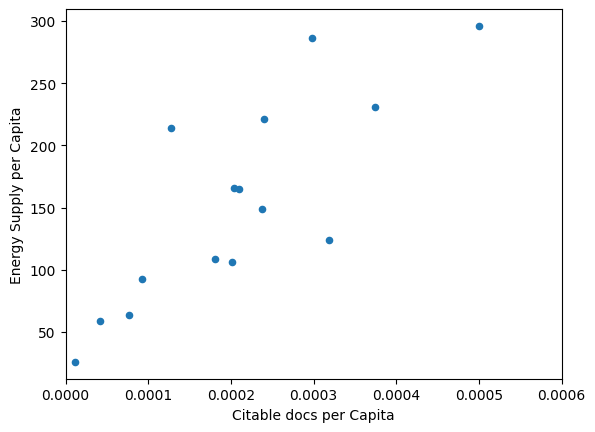

In [105]:
def plot9():
    import matplotlib as plt
    %matplotlib inline
    
    Top15 = answer_one()
    Top15['PopEst'] = Top15['Energy Supply'] / Top15['Energy Supply per Capita']
    Top15['Citable docs per Capita'] = Top15['Citable documents'] / Top15['PopEst']
    Top15.plot(x='Citable docs per Capita', y='Energy Supply per Capita', kind='scatter', xlim=[0, 0.0006])
    
plot9()

In [106]:
assert answer_nine() >= -1. and answer_nine() <= 1., "Q9: A valid correlation should between -1 to 1!"

### Question 10
Create a new column with a 1 if the country's % Renewable value is at or above the median for all countries in the top 15, and a 0 if the country's % Renewable value is below the median.

This function should return a series named HighRenew whose index is the country name sorted in ascending order of rank.

In [107]:
def answer_ten():
    # YOUR CODE HERE
    Energy = pd.read_excel('assets/Energy Indicators.xls', skiprows=17,skipfooter=38)
    Energy = Energy[['Unnamed: 1','Petajoules','Gigajoules','%']]
    Energy.columns = ['Country', 'Energy Supply', 'Energy Supply per Capita', '% Renewable']
    Energy[['Energy Supply', 'Energy Supply per Capita', '% Renewable']] =  Energy[['Energy Supply', 'Energy Supply per Capita', '% Renewable']].replace('...',np.NaN).apply(pd.to_numeric)
    Energy['Energy Supply'] = Energy['Energy Supply']*1000000
    Energy['Country'] = Energy['Country'].replace({'China, Hong Kong Special Administrative Region':'Hong Kong','United Kingdom of Great Britain and Northern Ireland':'United Kingdom','Republic of Korea':'South Korea','United States of America':'United States','Iran (Islamic Republic of)':'Iran'})
    Energy['Country'] = Energy['Country'].str.replace(r" \(.*\)","")

    # Load world_bank.csv
    GDP = pd.read_csv('assets/world_bank.csv',skiprows=4)
    GDP['Country Name'] = GDP['Country Name'].replace('Korea, Rep.','South Korea')
    GDP['Country Name'] = GDP['Country Name'].replace('Iran, Islamic Rep.','Iran')
    GDP['Country Name'] = GDP['Country Name'].replace('Hong Kong SAR, China','Hong Kong')
    GDP = GDP[['Country Name','2006','2007','2008','2009','2010','2011','2012','2013','2014','2015']]
    GDP.columns = ['Country','2006','2007','2008','2009','2010','2011','2012','2013','2014','2015']

    # Load scimagojr-3.xlsx
    ScimEn = pd.read_excel('assets/scimagojr-3.xlsx')
    ScimEn_m = ScimEn[:15]

    # Merge dataframes
    df = pd.merge(ScimEn_m, Energy, how = 'inner', left_on = 'Country', right_on='Country')
    final_df = pd.merge(df,GDP, how = 'inner', left_on = 'Country', right_on='Country')
    final_df = final_df.set_index('Country')

    # Calculate the median % Renewable for all countries in the top 15
    median_renewable = final_df['% Renewable'].median()

    # Create a new column with a 1 if the country's % Renewable value is at or above the median, and a 0 if the country's % Renewable value is below the median
    final_df['HighRenew'] = [1 if x >= median_renewable else 0 for x in final_df['% Renewable']]

    return final_df['HighRenew']
    raise NotImplementedError()

In [108]:
assert type(answer_ten()) == pd.Series, "Q10: You should return a Series!"

### Question 11
Use the following dictionary to group the Countries by Continent, then create a DataFrame that displays the sample size (the number of countries in each continent bin), and the sum, mean, and std deviation for the estimated population of each country.

ContinentDict  = {'China':'Asia', 
                  'United States':'North America', 
                  'Japan':'Asia', 
                  'United Kingdom':'Europe', 
                  'Russian Federation':'Europe', 
                  'Canada':'North America', 
                  'Germany':'Europe', 
                  'India':'Asia',
                  'France':'Europe', 
                  'South Korea':'Asia', 
                  'Italy':'Europe', 
                  'Spain':'Europe', 
                  'Iran':'Asia',
                  'Australia':'Australia', 
                  'Brazil':'South America'}
This function should return a DataFrame with index named Continent ['Asia', 'Australia', 'Europe', 'North America', 'South America'] and columns ['size', 'sum', 'mean', 'std']

In [109]:
def answer_eleven():
    # YOUR CODE HERE
    Energy = pd.read_excel('assets/Energy Indicators.xls', skiprows=17,skipfooter=38)
    Energy = Energy[['Unnamed: 1','Petajoules','Gigajoules','%']]
    Energy.columns = ['Country', 'Energy Supply', 'Energy Supply per Capita', '% Renewable']
    Energy[['Energy Supply', 'Energy Supply per Capita', '% Renewable']] =  Energy[['Energy Supply', 'Energy Supply per Capita', '% Renewable']].replace('...',np.NaN).apply(pd.to_numeric)
    Energy['Energy Supply'] = Energy['Energy Supply']*1000000
    Energy['Country'] = Energy['Country'].replace({'China, Hong Kong Special Administrative Region':'Hong Kong',
                                                   'United Kingdom of Great Britain and Northern Ireland':'United Kingdom',
                                                   'Republic of Korea':'South Korea','United States of America':'United States',
                                                   'Iran (Islamic Republic of)':'Iran'})
    Energy['Country'] = Energy['Country'].str.replace(r" \(.*\)","")

    # Define the dictionary to group the Countries by Continent
    ContinentDict  = {'China':'Asia', 
                      'United States':'North America', 
                      'Japan':'Asia', 
                      'United Kingdom':'Europe', 
                      'Russian Federation':'Europe', 
                      'Canada':'North America', 
                      'Germany':'Europe', 
                      'India':'Asia',
                      'France':'Europe', 
                      'South Korea':'Asia', 
                      'Italy':'Europe', 
                      'Spain':'Europe', 
                      'Iran':'Asia',
                      'Australia':'Australia', 
                      'Brazil':'South America'}

    # Group the countries by continent and calculate the sample size, sum, mean, and std deviation for the estimated population of each country
    Energy['Continent'] = Energy['Country'].map(ContinentDict)
    Energy['Population Estimate'] = Energy['Energy Supply'] / Energy['Energy Supply per Capita']
    result = Energy.groupby('Continent')['Population Estimate'].agg(size=np.size, sum=np.sum, mean=np.mean, std=np.std)

    return result
    raise NotImplementedError()

In [110]:
assert type(answer_eleven()) == pd.DataFrame, "Q11: You should return a DataFrame!"

assert answer_eleven().shape[0] == 5, "Q11: Wrong row numbers!"

assert answer_eleven().shape[1] == 4, "Q11: Wrong column numbers!"

### Question 12
Cut % Renewable into 5 bins. Group Top15 by the Continent, as well as these new % Renewable bins. How many countries are in each of these groups?

This function should return a Series with a MultiIndex of Continent, then the bins for % Renewable. Do not include groups with no countries.

In [121]:
def answer_twelve():
	# YOUR CODE HERE
	Energy = pd.read_excel('assets/Energy Indicators.xls', skiprows=17, skipfooter=38)
	Energy = Energy[['Unnamed: 1', 'Petajoules', 'Gigajoules', '%']]
	Energy.columns = ['Country', 'Energy Supply', 'Energy Supply per Capita', '% Renewable']
	Energy[['Energy Supply', 'Energy Supply per Capita', '% Renewable']] = Energy[['Energy Supply', 'Energy Supply per Capita', '% Renewable']].replace('...', np.NaN).apply(pd.to_numeric)
	Energy['Energy Supply'] *= 1000000
	Energy['Country'] = Energy['Country'].replace({"Republic of Korea": "South Korea",
													"United States of America": "United States",
													"United Kingdom of Great Britain and Northern Ireland": "United Kingdom",
													"China, Hong Kong Special Administrative Region": "Hong Kong"})

	Energy['Country'] = Energy['Country'].str.replace(r" \(.*\)", "")
	Energy['Country'] = Energy['Country'].str.replace(r"\d+", "")
	Energy['Country'] = Energy['Country'].str.strip()

	ContinentDict = {'China': 'Asia',
						'United States': 'North America',
						'Japan': 'Asia',
						'United Kingdom': 'Europe',
						'Russian Federation': 'Europe',
						'Canada': 'North America',
						'Germany': 'Europe',
						'India': 'Asia',
						'France': 'Europe',
						'South Korea': 'Asia',
						'Italy': 'Europe',
						'Spain': 'Europe',
						'Iran': 'Asia',
						'Australia': 'Australia',
						'Brazil': 'South America'}

	Energy['Continent'] = Energy['Country'].map(ContinentDict)
	Energy['% Renewable bins'] = pd.cut(Energy['% Renewable'], 5)
	result = Energy.groupby(['Continent', '% Renewable bins']).size().unstack(fill_value=0).stack()

	return result
	raise NotImplementedError()

len(answer_twelve())

25

In [122]:
assert type(answer_twelve()) == pd.Series, "Q12: You should return a Series!"

assert len(answer_twelve()) == 25, "Q12: Wrong result numbers!"

### Question 13
Convert the Population Estimate series to a string with thousands separator (using commas). Use all significant digits (do not round the results).

e.g. 12345678.90 -> 12,345,678.90

This function should return a series PopEst whose index is the country name and whose values are the population estimate string

In [ ]:
def answer_thirteen():
    # YOUR CODE HERE
    energy = pd.read_excel('assets/Energy Indicators.xls', skiprows=17,skipfooter=38)
    energy = energy[['Unnamed: 1','Petajoules','Gigajoules','%']]
    energy.columns = ['Country', 'Energy Supply', 'Energy Supply per Capita', '% Renewable']
    energy[['Energy Supply', 'Energy Supply per Capita', '% Renewable']] =  energy[['Energy Supply', 'Energy Supply per Capita', '% Renewable']].replace('...',np.NaN).apply(pd.to_numeric)
    energy['Energy Supply'] = energy['Energy Supply']*1000000
    energy['Country'] = energy['Country'].replace({'China, Hong Kong Special Administrative Region':'Hong Kong','United Kingdom of Great Britain and Northern Ireland':'United Kingdom','Republic of Korea':'South Korea','United States of America':'United States','Iran (Islamic Republic of)':'Iran'})
    energy['Country'] = energy['Country'].str.replace(r" \(.*\)","")

    # Load world_bank.csv
    GDP = pd.read_csv('assets/world_bank.csv',skiprows=4)
    GDP['Country Name'] = GDP['Country Name'].replace('Korea, Rep.','South Korea')
    GDP['Country Name'] = GDP['Country Name'].replace('Iran, Islamic Rep.','Iran')
    GDP['Country Name'] = GDP['Country Name'].replace('Hong Kong SAR, China','Hong Kong')
    GDP = GDP[['Country Name','2006','2007','2008','2009','2010','2011','2012','2013','2014','2015']]
    GDP.columns = ['Country','2006','2007','2008','2009','2010','2011','2012','2013','2014','2015']

    # Load scimagojr-3.xlsx
    ScimEn = pd.read_excel('assets/scimagojr-3.xlsx')
    ScimEn_m = ScimEn[:15]

    # Merge dataframes
    df = pd.merge(ScimEn_m, energy, how = 'inner', left_on = 'Country', right_on='Country')
    final_df = pd.merge(df,GDP, how = 'inner', left_on = 'Country', right_on='Country')
    final_df = final_df.set_index('Country')

    # Create a column that estimates the population using Energy Supply and Energy Supply per capita
    final_df['Population Estimate'] = final_df['Energy Supply'] / final_df['Energy Supply per Capita']

    # Convert the Population Estimate series to a string with thousands separator (using commas)
    PopEst = final_df['Population Estimate'].apply('{:,}'.format)

    return PopEst
    raise NotImplementedError()

In [ ]:
assert type(answer_thirteen()) == pd.Series, "Q13: You should return a Series!"

assert len(answer_thirteen()) == 15, "Q13: Wrong result numbers!"